# Synchronisation in Coupled Tent Maps

## Defining the Tent Map

$f(x, \mu) = 
   \begin{cases} 
   \mu x & \text{if } x < 0.5 \\
   \mu (1 - x) & \text{if } x \geq 0.5 
   \end{cases}$

Let us consider $\mu$ = 1.9999....

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
from scipy.spatial import cKDTree
from numba import njit
import csv

In [2]:
def tent(x, mu):
    if x < 0.5:
        return mu * x
    else:
        return mu * (1 - x)

In [3]:
def tent_der(x, mu):
    if x < 0.5:
        return mu
    else:
        return -mu

In [4]:
def ctent(x, y, yres, mu, k):
    x_next = tent(x, mu)
    y_next = tent(y, mu) + k*(tent(x, mu) - tent(y, mu))
    yres_next = tent(yres, mu) + k*(tent(x, mu) - tent(yres, mu))
    return x_next, y_next, yres_next

## Dynamics

In [5]:
def plotgraf(mu, k, e, n_transients, n_iterations = 10000):
    global x_kpe, y_kpe, x_kme, y_kme, x_t, y_t, standard
    x, y, yres = np.random.rand(), np.random.rand(), np.random.rand()
    standard = (x, y, yres)
    x_vals, y_vals = [], []
    
    for i in range(n_transients):
        x, y, yres = ctent(x, y, yres, mu, k)
    for i in range(n_iterations):
        x, y, yres = ctent(x, y, yres, mu, k)
        x_vals.append(x)
        y_vals.append(y)

    x_t, y_t = x_vals, y_vals

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.plot(x_t, y_t, 'o', markersize = 1)
    plt.title(f'Dynamics for k = {k}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)

    # Resetting initial conditions
    x, y, yres = standard[0], standard[2], standard[2]
    x_kpe, y_kpe = [], []
    x_kme, y_kme = [], []

    for i in range(n_transients):
        x, y, yres = ctent(x, y, yres, mu, k + e)
    for i in range(n_iterations):
        x, y, yres = ctent(x, y, yres, mu, k + e)
        x_kpe.append(x)
        y_kpe.append(y)

    # Resetting initial conditions
    x, y, yres = standard[0], standard[2], standard[2]
        
    for i in range(n_transients):
        x, y, yres = ctent(x, y, yres, mu, k - e)
    for i in range(n_iterations):
        x, y, yres = ctent(x, y, yres, mu, k - e)
        x_kme.append(x)
        y_kme.append(y)
    
    plt.subplot(1, 3, 2)
    plt.plot(x_kpe, y_kpe, 'o', markersize = 1)
    plt.title(f'Dynamics for $k + \epsilon$ ({k + e})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)

    # Plot for k - epsilon
    plt.subplot(1, 3, 3)
    plt.plot(x_kme, y_kme, 'o', markersize = 1)
    plt.title(f'Dynamics for $k - \epsilon$ ({k - e})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

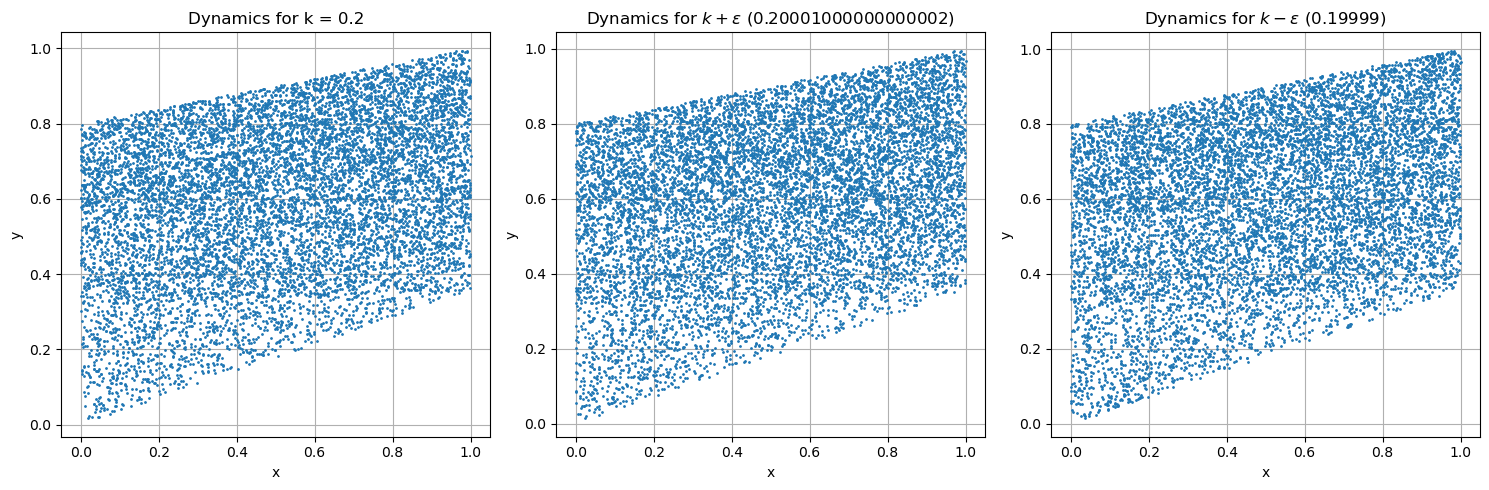

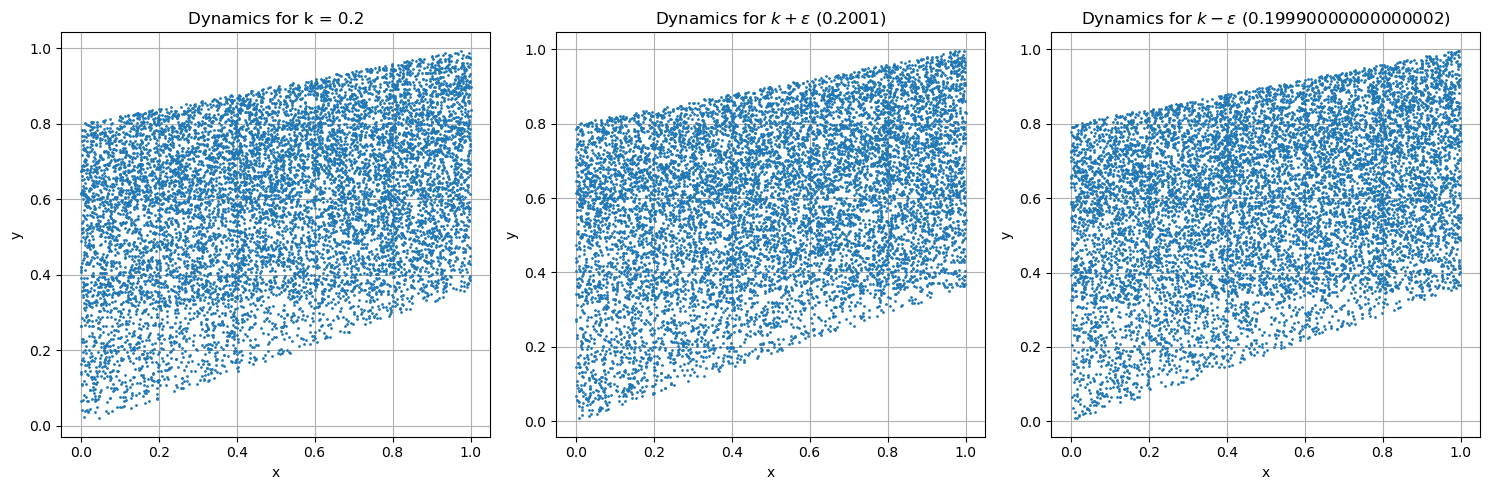

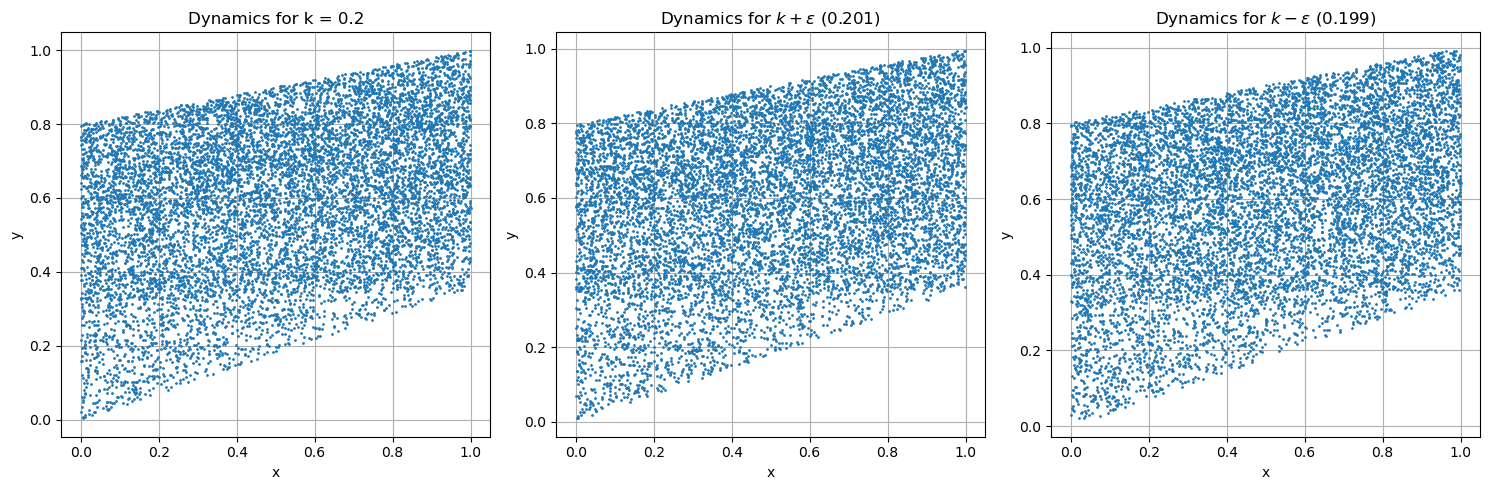

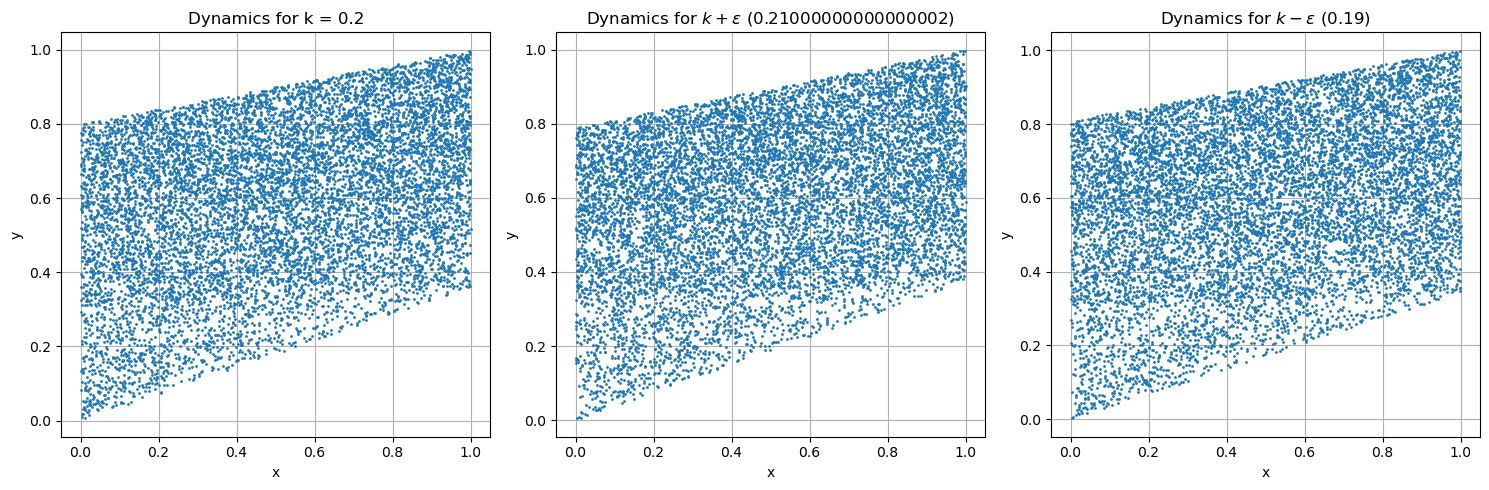

In [8]:
# Parameters
mu = 1.9999999999999
e_values = np.logspace(-5, -2, num=4)
k_values = [0.2, 0.3, 0.500]
n_transients = 100

# Unsynchronised Case: k = 0.2
for e in e_values:
    plotgraf(mu, k_values[0], e, n_transients, 10000)

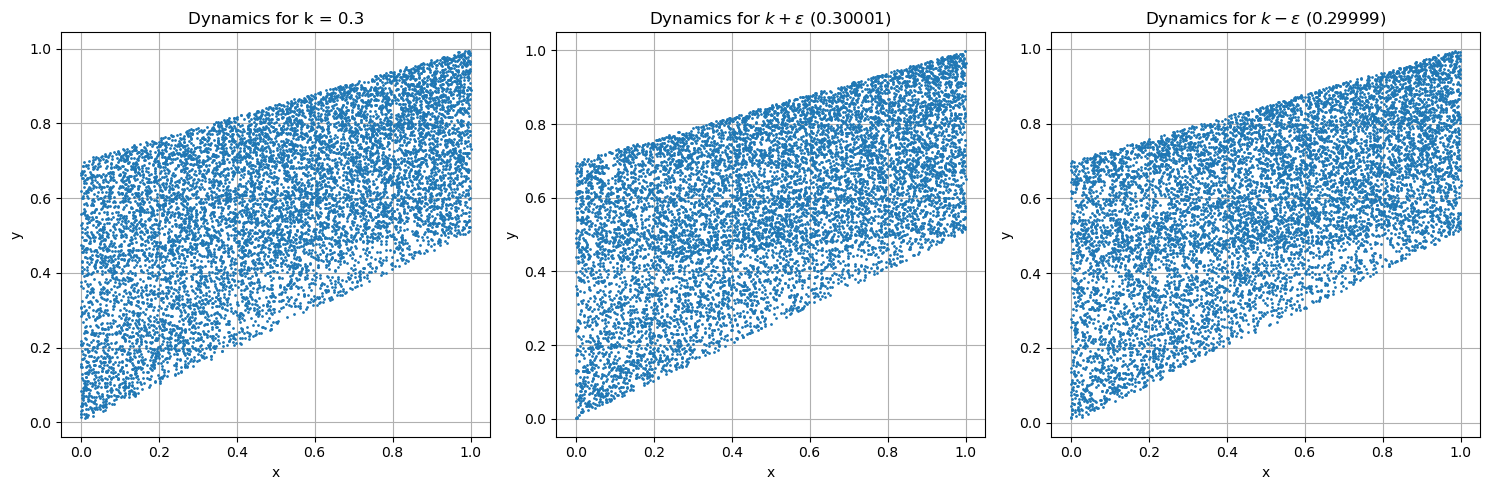

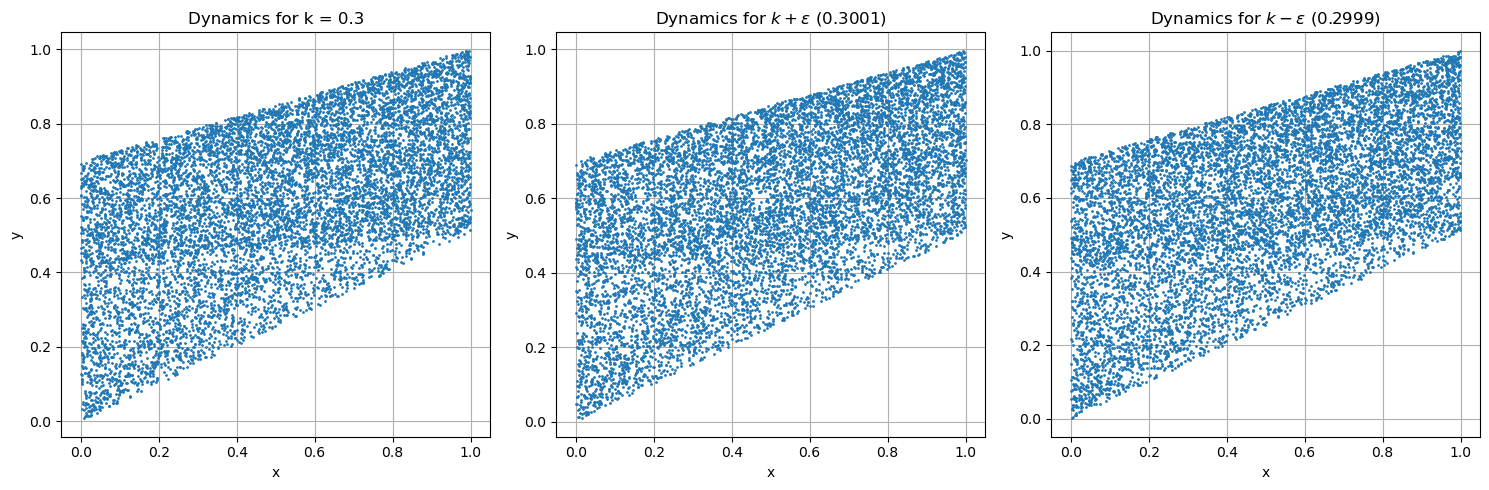

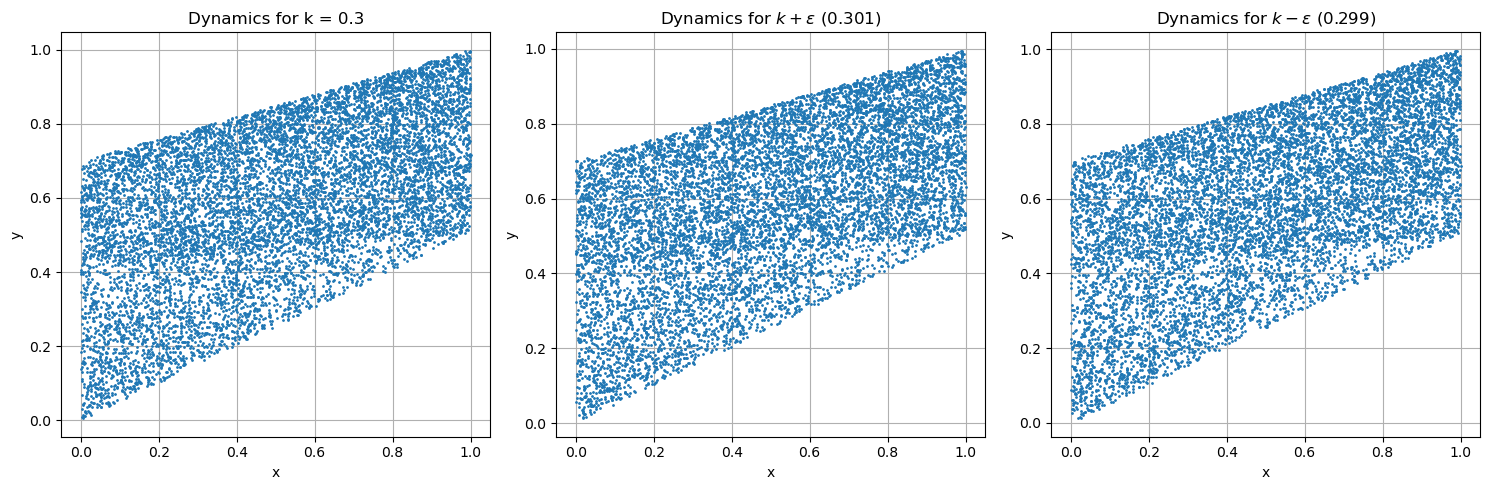

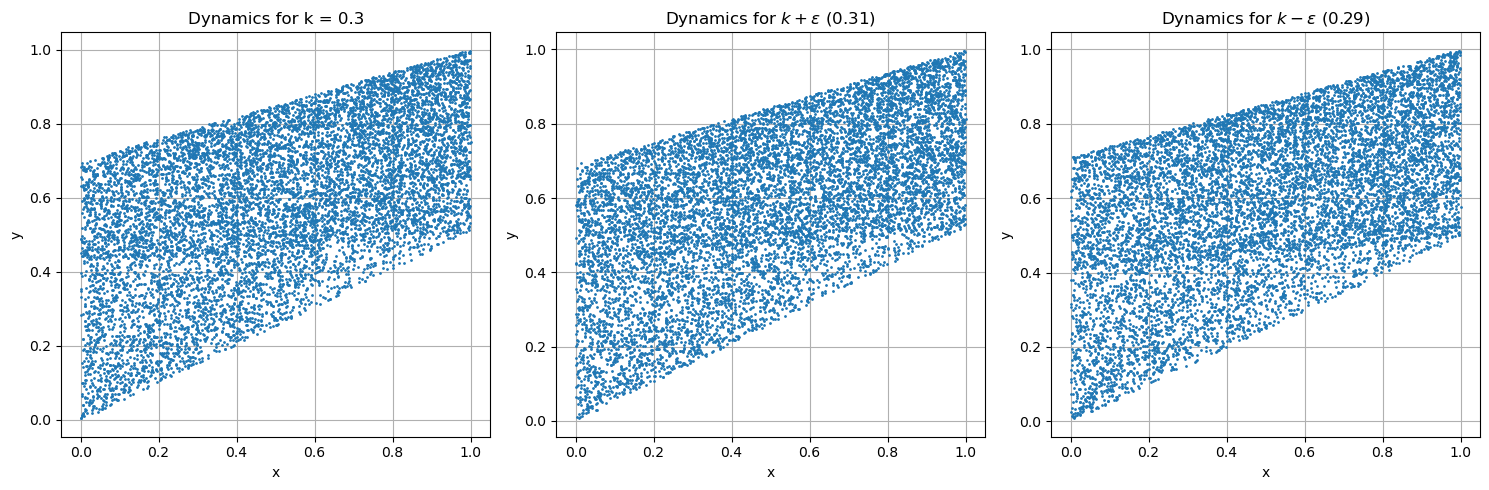

In [15]:
for e in e_values:
    plotgraf(mu, k_values[1], e, n_transients, 10000)

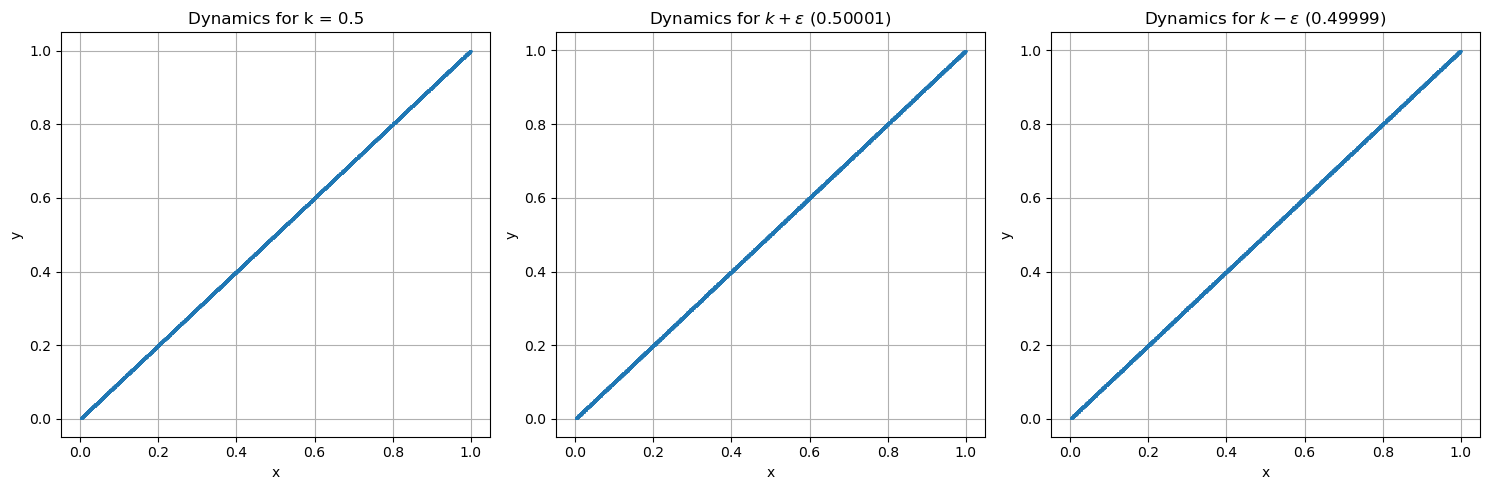

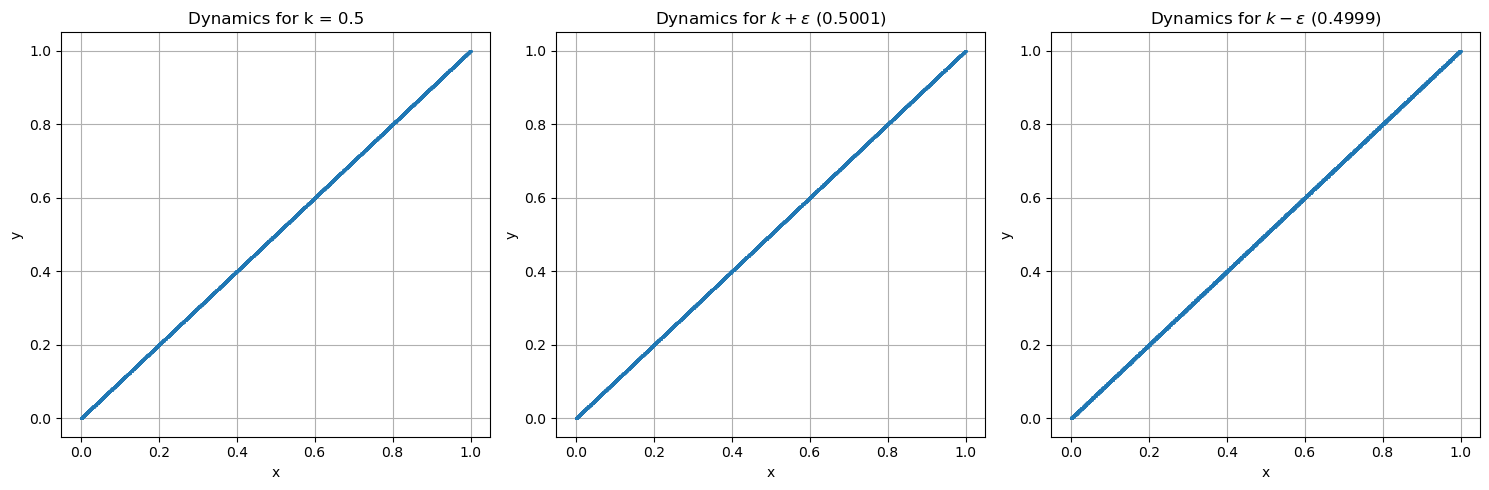

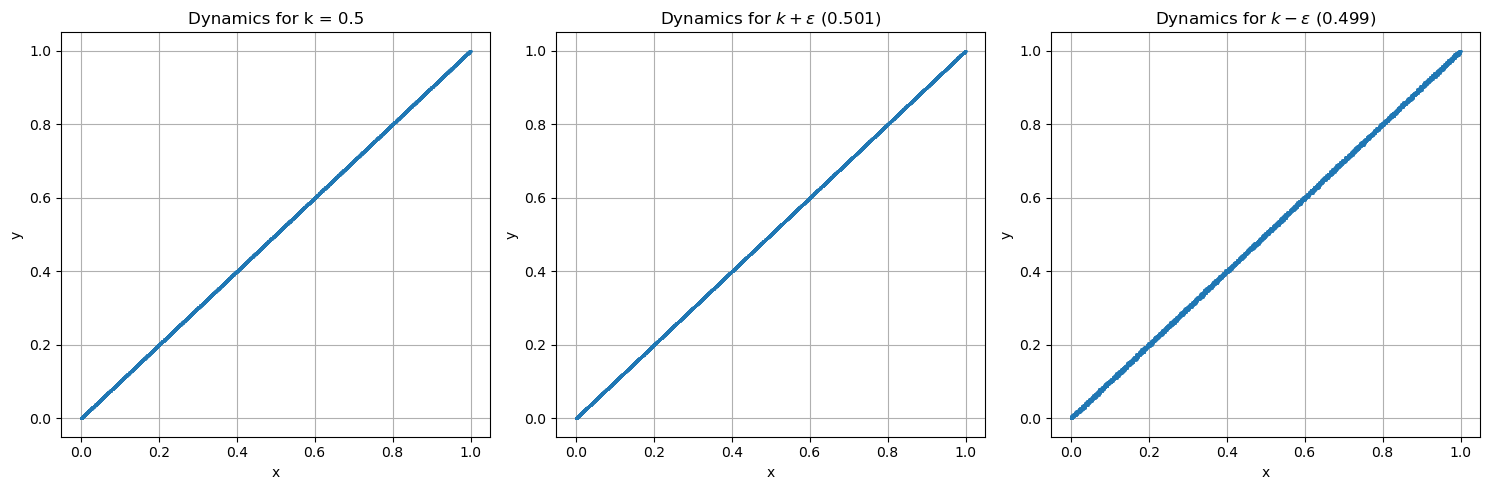

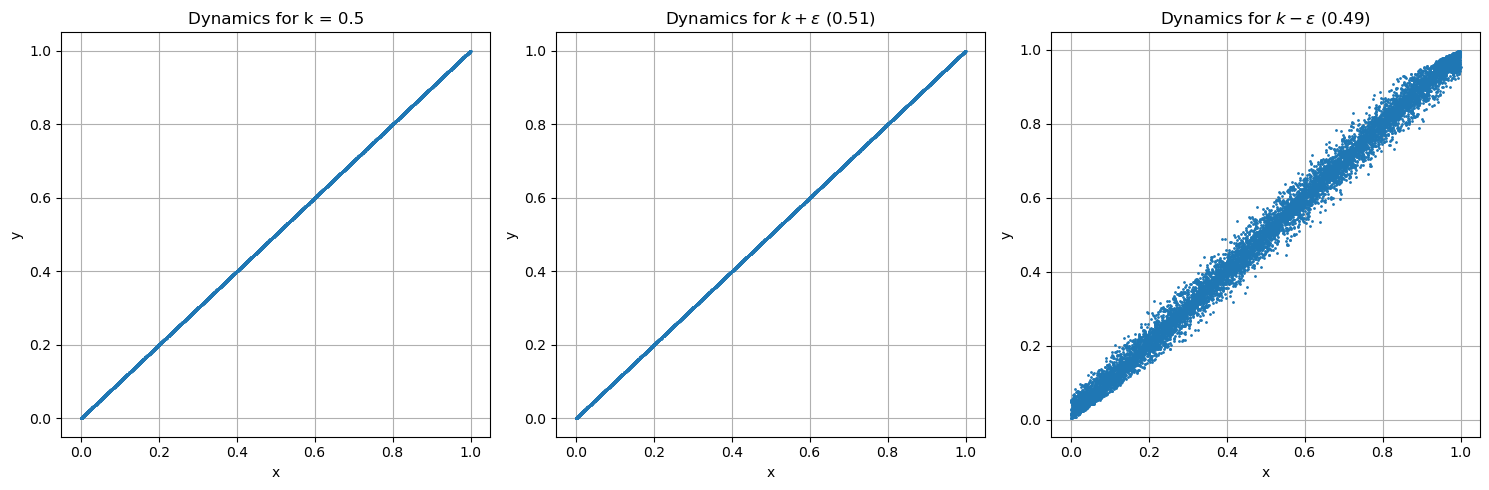

In [17]:
for e in e_values:
    plotgraf(mu, k_values[2], e, n_transients, 10000)

In [11]:
print(standard)

(0.6474237770599659, 0.5836210274338184, 0.09597492483215586)


## Comparing With Coupled Logistic System

In [14]:
# Importing Old Functions
def clm(x, y, yres, k, a = 1):
    x_next = 4 * a * x * (1 - x)
    y_next = (4 * a * y * (1 - y)) * (1 - k) + (4 * a * k * x * (1 - x))
    yres_next = (4 * a * yres * (1 - yres)) * (1 - k) + (4 * a * k * x * (1 - x))
    return x_next, y_next, yres_next

def clm_dyn(initial, k, a, n_iterations, n_transients):
    x, y, yres = initial
    x_vals, y_vals, yres_vals = [], [], []
    
    for i in range(n_iterations):
        x, y, yres = clm(x, y, yres, k, a = 1)
        if i >= n_transients:
            x_vals.append(x)
            y_vals.append(y)
            yres_vals.append(yres)
    return x_vals, y_vals

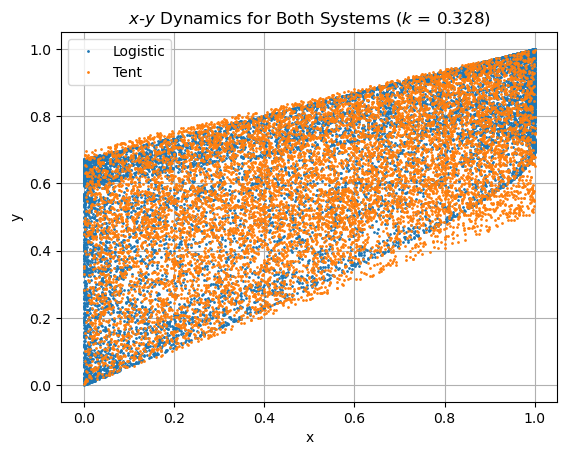

In [16]:
a = 1
k = 0.328
n_iterations = 10000
n_transients = 500

x_vals, y_vals = clm_dyn(standard, k, a, n_iterations, n_transients)
plt.figure()
plt.plot(x_vals, y_vals, 'o', markersize = 1, label = 'Logistic')
plt.title(f'$x$-$y$ Dynamics for Both Systems ($k$ = {k})')
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x_t, y_t, 'o', markersize = 1, label = 'Tent')
plt.legend()
plt.grid(True)
plt.show()

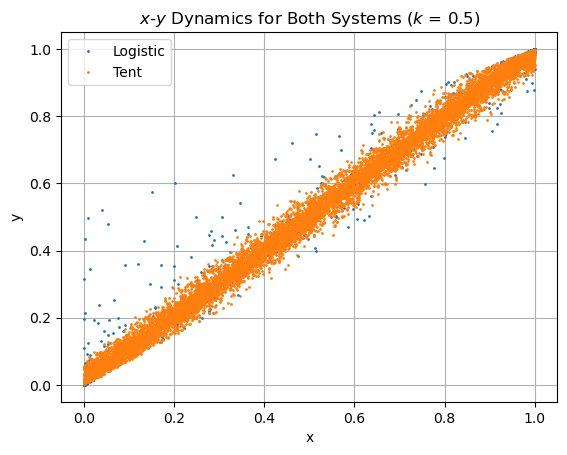

In [18]:
a = 1
k = 0.500
n_iterations = 10000
n_transients = 500
initial = (0.8238448418984619, 0.3205236575535735, 0.7813905349518432)

x_vals, y_vals = clm_dyn(initial, k, a, n_iterations, n_transients)
plt.figure()
plt.plot(x_vals, y_vals, 'o', markersize = 1, label = 'Logistic')
plt.title(f'$x$-$y$ Dynamics for Both Systems ($k$ = {k})')
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x_kme, y_kme, 'o', markersize = 1, label = 'Tent')
plt.grid(True)
plt.legend()
plt.show()

## Lyapunov Analysis

In [5]:
def con_lyapunov(mu, k, n_iterations, n_transients):
    x, y, yres = np.random.rand(), np.random.rand(), np.random.rand()
    le_sum = np.zeros(2)
    
    v1 = np.array([1, 0])
    v2 = np.array([0, 1])
    
    for i in range(n_transients):
        x, y, yres = ctent(x, y, yres, mu, k)

    for i in range(n_iterations):
        x, y, yres = ctent(x, y, yres, mu, k)
        T_y = tent_der(y, mu)
        T_yres = tent_der(yres, mu)
        J = np.array([[(1 - k) * T_y, 0],
                      [0, (1 - k) * T_yres]])
        
        v1 = np.dot(J, v1)
        v2 = np.dot(J, v2)
        
        # Gram-Schmidt Orthogonalisation
        v2 -= (np.dot(v1, v2) / np.dot(v1, v1)) * v1
        
        # Normalisation
        v1_norm = np.linalg.norm(v1)
        v2_norm = np.linalg.norm(v2)
        if v1_norm == 0 or v2_norm == 0:
            return np.array([np.nan, np.nan])
        v1 /= v1_norm
        v2 /= v2_norm

        le_sum[0] += np.log(v1_norm)
        le_sum[1] += np.log(v2_norm)
    
    le_sum /= n_iterations
    return le_sum

In [6]:
def trans_lyapunov(mu, k, n_iterations, n_transients):
    x, y, yres = np.random.rand(), np.random.rand(), np.random.rand()
    le_sum = np.zeros(2)
    
    v1 = np.array([1, 0])
    v2 = np.array([0, 1])
    
    for i in range(n_transients):
        x, y, yres = ctent(x, y, yres, mu, k)

    for i in range(n_iterations):
        x, y, yres = ctent(x, y, yres, mu, k)
        T_x = tent_der(x, mu)
        T_y = tent_der(y, mu)
        J = np.array([[T_x, 0],
                      [k * T_x, (1 - k) * T_y]])
        
        v1 = np.dot(J, v1)
        v2 = np.dot(J, v2)
        
        # Gram-Schmidt Orthogonalisation
        v2 -= (np.dot(v1, v2) / np.dot(v1, v1)) * v1
        
        # Normalisation
        v1_norm = np.linalg.norm(v1)
        v2_norm = np.linalg.norm(v2)
        if v1_norm == 0 or v2_norm == 0:
            return np.array([np.nan, np.nan])
        v1 /= v1_norm
        v2 /= v2_norm

        le_sum[0] += np.log(v1_norm)
        le_sum[1] += np.log(v2_norm)
    
    le_sum /= n_iterations
    return le_sum

/tmp/ipykernel_4777/2262990845.py:22: RuntimeWarning: invalid value encountered in scalar divide
  v2 -= (np.dot(v1, v2) / np.dot(v1, v1)) * v1
/tmp/ipykernel_4777/1449652612.py:16: RuntimeWarning: divide by zero encountered in log
  trans_le = np.log(1 - k_values) + np.array(trans_le)
/tmp/ipykernel_4777/1449652612.py:17: RuntimeWarning: divide by zero encountered in log
  con_le = np.log(1 - k_values) + np.array(con_le)


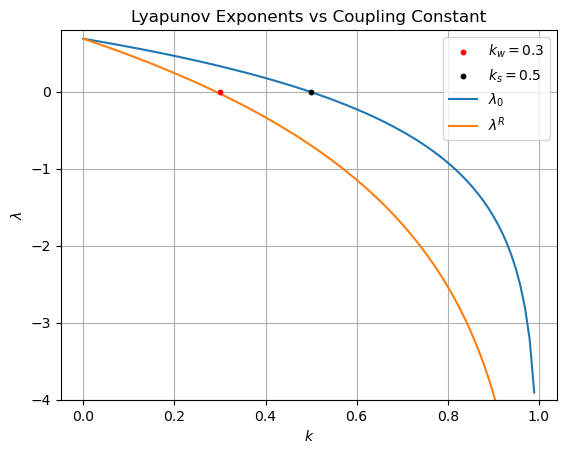

In [15]:
# Parameters
mu = 1.99
k_values = np.linspace(0, 1, 100)
n_iterations = 1000
n_transients = 500

con_le = []
trans_le = []

for k in k_values:
    le = trans_lyapunov(mu, k, n_iterations, n_transients)
    trans_le.append(le[0])
    le = con_lyapunov(mu, k, n_iterations, n_transients)
    con_le.append(le[0])
    
trans_le = np.log(1 - k_values) + np.array(trans_le)
con_le = np.log(1 - k_values) + np.array(con_le)

# Thresholds (Obtained by Eyeballing)
plt.scatter(0.300, 0, color = 'r', zorder = 4, s = 10, label = r'$k_{w} = 0.3$')
plt.scatter(0.500, 0, color = 'k', zorder = 3, s = 10, label = r'$k_{s} = 0.5$')

plt.plot(k_values, trans_le, zorder = 2, label = r'$\lambda_{0}$')
plt.plot(k_values, con_le, zorder = 2, label = r'$\lambda^{R}$')

plt.xlabel(r'$k$')
plt.ylabel(r'$\lambda$')
plt.ylim(-4, 0.8)
plt.title('Lyapunov Exponents vs Coupling Constant')
plt.legend()
plt.grid(True)
plt.show()

# Synchronisation in Coupled Sine Maps

## Defining the Sine Map

$x_{n+1} = r\sin{(\pi x_{n})}$

Let us consider $r$ = 0.9

In [36]:
def sine(x, r):
    return r * np.sin(np.pi * x)

In [37]:
def csine(x, y, yres, r, k):
    x_next = sine(x, mu)
    y_next = sine(y, mu) + k*(sine(x, mu) - sine(y, mu))
    yres_next = sine(yres, mu) + k*(sine(x, mu) - sine(yres, mu))
    return x_next, y_next, yres_next

## Dynamics

In [38]:
def plotgraf_1(initial, k, r, n_iterations, n_transients):
    x, y, yres = initial
    x_vals, y_vals, yres_vals = [], [], []
    
    for i in range(n_iterations):
        x, y, yres = csine(x, y, yres, r, k)
        if i >= n_transients:
            x_vals.append(x)
            y_vals.append(y)
            yres_vals.append(yres)
    
    # y-x phase portrait
    plt.figure()
    plt.plot(x_vals, y_vals, 'o', markersize = 1)
    plt.title(f'$x$-$y$ Phase Portrait ($k$ = {k})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()
    
    # y-y' phase portrait
    plt.figure()
    plt.plot(y_vals, yres_vals, 'o', markersize = 1)
    plt.title(f"$y$-$y$\' Phase Portrait ($k$ = {k})")
    plt.xlabel('y')
    plt.ylabel('y\'')
    plt.grid(True)
    plt.show()

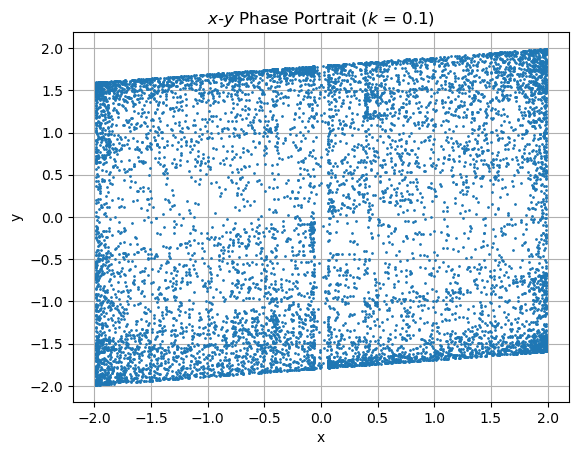

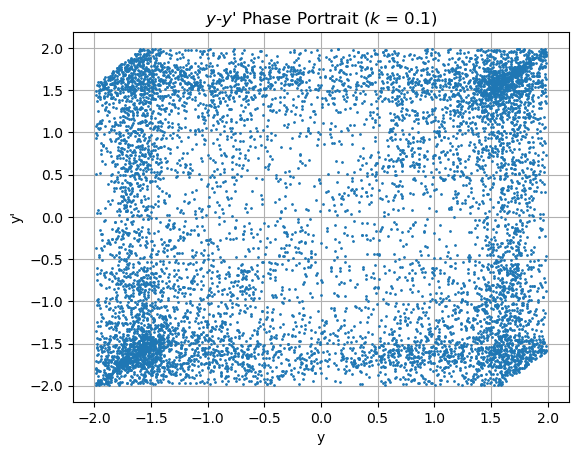

In [39]:
# Unsynchronised Case: k = 0.1
r = 1
k = 0.1
n_iterations = 10000
n_transients = 500
initial = (np.random.rand(), np.random.rand(), np.random.rand())

plotgraf_1(initial, k, r, n_iterations, n_transients)

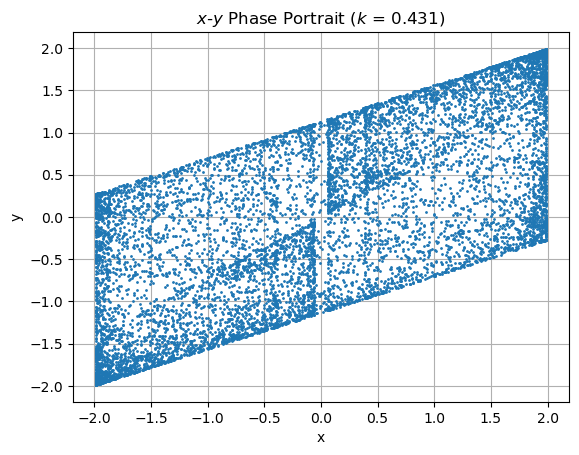

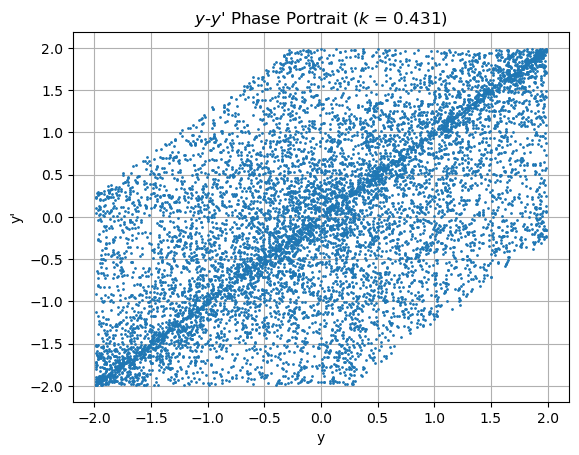

In [40]:
# WS Case: k = 0.431
r = 1
k = 0.431
n_iterations = 10000
n_transients = 500

plotgraf_1(initial, k, r, n_iterations, n_transients)

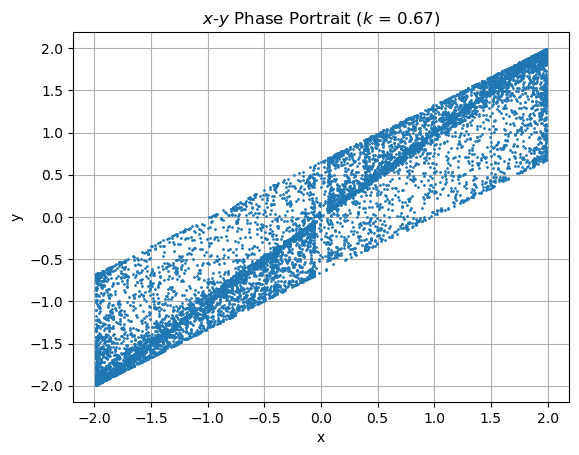

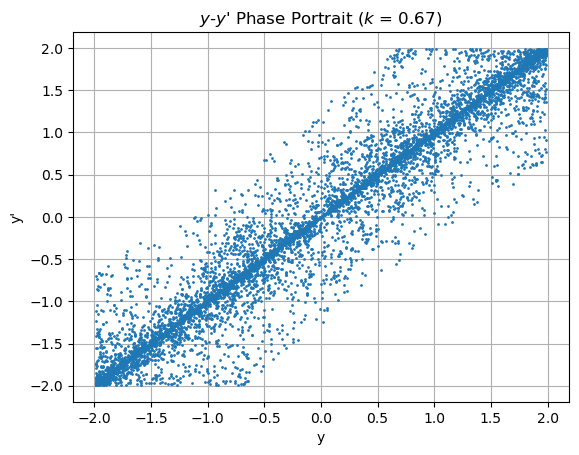

In [41]:
# SS Case: k = 0.84
r = 1
k = 0.670
n_iterations = 10000
n_transients = 500

plotgraf_1(initial, k, r, n_iterations, n_transients)

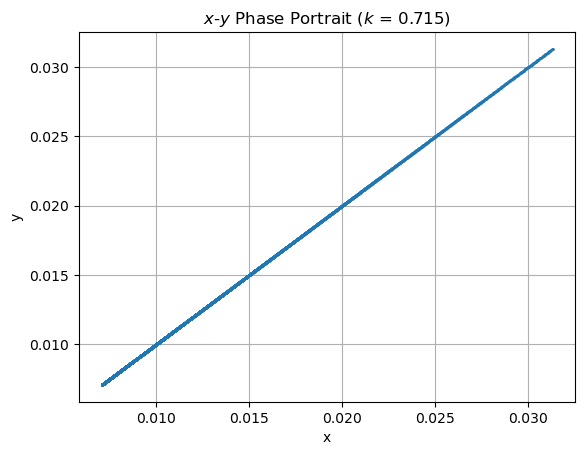

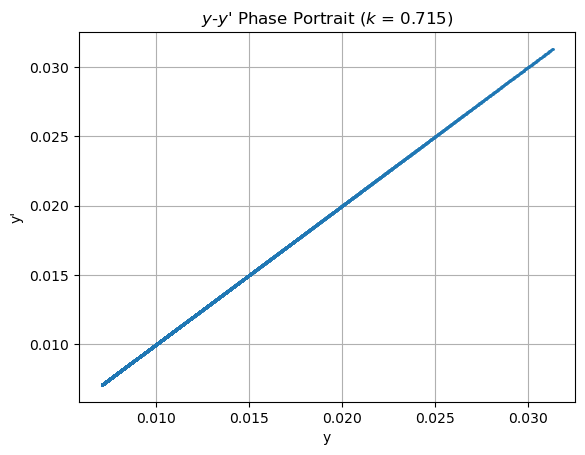

In [28]:
# Alternate Threshold
r = 1
k = 0.715
n_iterations = 10000
n_transients = 500

plotgraf_1(initial, k, r, n_iterations, n_transients)

## Lyapunov Analysis

In [36]:
def strans_lyapunov(r, k, n_iterations, n_transients):
    x, y, yres = np.random.rand(), np.random.rand(), np.random.rand()
    le_sum = np.zeros(2)
    
    v1 = np.array([1, 0])
    v2 = np.array([0, 1])
    
    for i in range(n_transients):
        x, y, yres = ctent(x, y, yres, r, k)

    for i in range(n_iterations):
        x, y, yres = ctent(x, y, yres, r, k)
        J = np.array([[np.pi * r * np.cos(np.pi * x), 0],
                      [np.pi * k * r * np.cos(np.pi * x), np.pi * (1 - k) * r * np.cos(np.pi * y)]])
        
        v1 = np.dot(J, v1)
        v2 = np.dot(J, v2)
        
        # Gram-Schmidt Orthogonalisation
        v2 -= (np.dot(v1, v2) / np.dot(v1, v1)) * v1
        
        # Normalisation
        v1_norm = np.linalg.norm(v1)
        v2_norm = np.linalg.norm(v2)
        if v1_norm == 0 or v2_norm == 0:
            return np.array([np.nan, np.nan])
        v1 /= v1_norm
        v2 /= v2_norm

        le_sum[0] += np.log(v1_norm)
        le_sum[1] += np.log(v2_norm)
    
    le_sum /= n_iterations
    return le_sum

In [37]:
def scon_lyapunov(r, k, n_iterations, n_transients):
    x, y, yres = np.random.rand(), np.random.rand(), np.random.rand()
    le_sum = np.zeros(2)
    
    v1 = np.array([1, 0])
    v2 = np.array([0, 1])
    
    for i in range(n_transients):
        x, y, yres = csine(x, y, yres, r, k)

    for i in range(n_iterations):
        x, y, yres = csine(x, y, yres, r, k)
        J = np.array([[np.pi * (1 - k) * r * np.cos(np.pi * y), 0],
                      [0, np.pi * (1 - k) * r * np.cos(np.pi * yres)]])
        
        v1 = np.dot(J, v1)
        v2 = np.dot(J, v2)
        
        # Gram-Schmidt Orthogonalisation
        v2 -= (np.dot(v1, v2) / np.dot(v1, v1)) * v1
        
        # Normalisation
        v1_norm = np.linalg.norm(v1)
        v2_norm = np.linalg.norm(v2)
        if v1_norm == 0 or v2_norm == 0:
            return np.array([np.nan, np.nan])
        v1 /= v1_norm
        v2 /= v2_norm

        le_sum[0] += np.log(v1_norm)
        le_sum[1] += np.log(v2_norm)
    
    le_sum /= n_iterations
    return le_sum

/tmp/ipykernel_6397/2856113740.py:20: RuntimeWarning: invalid value encountered in scalar divide
  v2 -= (np.dot(v1, v2) / np.dot(v1, v1)) * v1
/tmp/ipykernel_6397/693368057.py:16: RuntimeWarning: divide by zero encountered in log
  trans_le = np.log(1 - k_values) + np.array(trans_le)
/tmp/ipykernel_6397/693368057.py:17: RuntimeWarning: divide by zero encountered in log
  con_le = np.log(1 - k_values) + np.array(con_le)


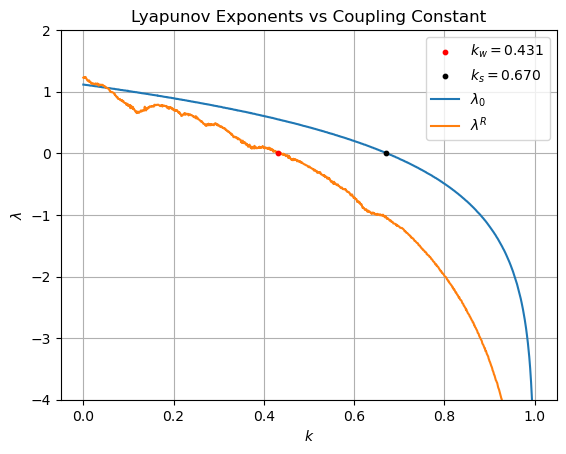

In [87]:
# Parameters
r = 1
k_values = np.linspace(0, 1, 1000)
n_iterations = 10000
n_transients = 500

con_le = []
trans_le = []

for k in k_values:
    le = strans_lyapunov(mu, k, n_iterations, n_transients)
    trans_le.append(le[0])
    le = scon_lyapunov(mu, k, n_iterations, n_transients)
    con_le.append(le[0])
    
trans_le = np.log(1 - k_values) + np.array(trans_le)
con_le = np.log(1 - k_values) + np.array(con_le)

# Thresholds (Obtained by Eyeballing)
plt.scatter(0.431, 0, color = 'r', zorder = 4, s = 10, label = r'$k_{w} = 0.431$')
plt.scatter(0.670, 0, color = 'k', zorder = 3, s = 10, label = r'$k_{s} = 0.670$')

plt.plot(k_values, trans_le, zorder = 2, label = r'$\lambda_{0}$')
plt.plot(k_values, con_le, zorder = 2, label = r'$\lambda^{R}$')

plt.xlabel(r'$k$')
plt.ylabel(r'$\lambda$')
plt.ylim(-4, 2)
plt.title('Lyapunov Exponents vs Coupling Constant')
plt.legend()
plt.grid(True)
plt.show()

# Synchronisation in Coupled Cubic Maps

## Defining the Cubic Map

$x_{n+1} = rx(1 - x^{2})$

In [16]:
def cubic(x, r):
        return r * x * (1 - x**2)

/tmp/ipykernel_18192/666289907.py:2: RuntimeWarning: overflow encountered in square
  return r * x * (1 - x**2)
/tmp/ipykernel_18192/666289907.py:2: RuntimeWarning: overflow encountered in multiply
  return r * x * (1 - x**2)


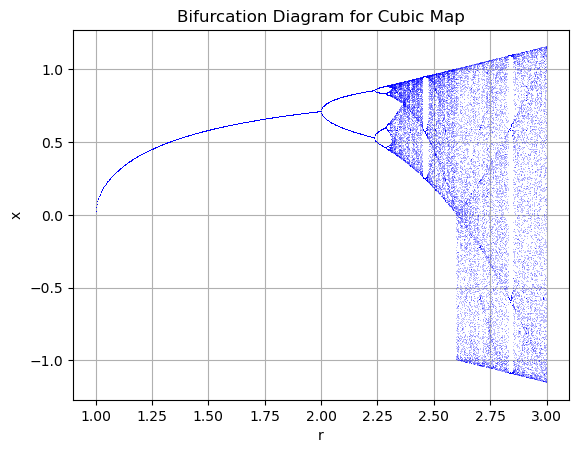

In [17]:
def bifurc(r_min, r_max, num_r, n_iterations, num_last):
    r_values = np.linspace(r_min, r_max, num_r)
    x = 0.1 * np.ones(num_r)  # initial condition for all r values
    res = np.empty((num_r, num_last))

    for i in range(n_iterations):
        x = cubic(x, r_values)
        if i >= (n_iterations - num_last):
            res[:, i - (n_iterations - num_last)] = x
            
    plt.plot(r_values, res, ',b', alpha=0.25)
    plt.xlabel('r')
    plt.ylabel('x')
    plt.title('Bifurcation Diagram for Cubic Map')
    plt.grid('True')
    plt.show()

r_min = 1.0
r_max = 3.5
num_r = 1000
num_iterations = 1000
num_last = 100

bifurc(r_min, r_max, num_r, n_iterations, num_last)

Let $r$ = 2.5

In [18]:
def ccubic(x, y, yres, r, k):
    x_next = cubic(x, r)
    y_next = cubic(y, r) + k * (cubic(x, r) - cubic(y, r))
    yres_next = cubic(yres, r) + k * (cubic(x, r) - cubic(yres, r))
    return x_next, y_next, yres_next

## Dynamics

In [26]:
def plotgraf_2(initial, k, r, n_iterations, n_transients):
    x, y, yres = initial
    x_vals, y_vals, yres_vals = [], [], []
    
    for i in range(n_iterations):
        x, y, yres = ccubic(x, y, yres, r, k)
        if i >= n_transients:
            x_vals.append(x)
            y_vals.append(y)
            yres_vals.append(yres)
    
    # y-x phase portrait
    plt.figure()
    plt.plot(x_vals, y_vals, 'o', markersize = 1)
    plt.title(f'$x$-$y$ Phase Portrait ($k$ = {k})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()
    
    # y-y' phase portrait
    plt.figure()
    plt.plot(y_vals, yres_vals, 'o', markersize = 1)
    plt.title(f"$y$-$y$\' Phase Portrait ($k$ = {k})")
    plt.xlabel('y')
    plt.ylabel('y\'')
    plt.grid(True)
    plt.show()

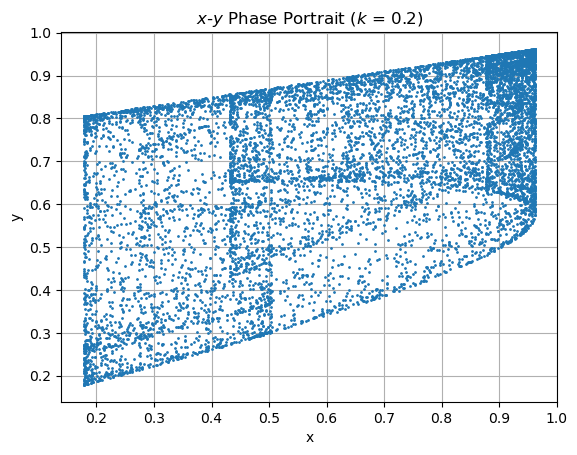

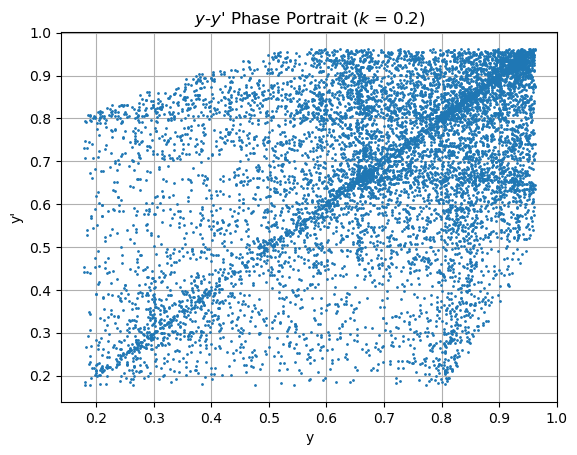

In [45]:
# Unsynchronised Case: k = 0.2
r = 2.5
k = 0.2
n_iterations = 10000
n_transients = 500

plotgraf_2(initial, k, r, n_iterations, n_transients)

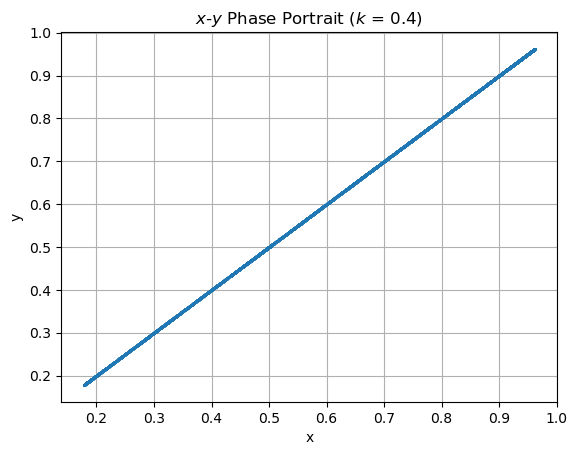

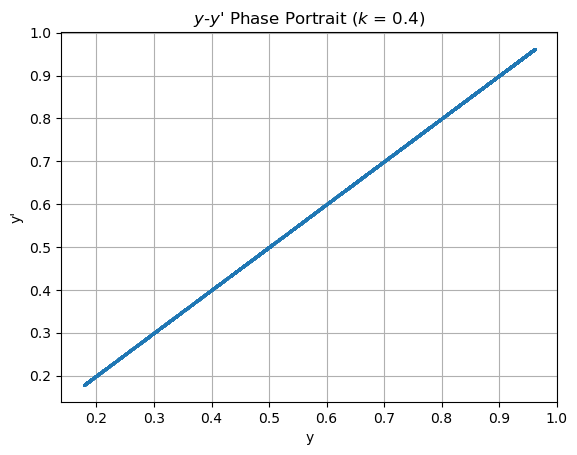

In [53]:
# SS Threshold: k = 0.4
k = 0.4
n_iterations = 10000
n_transients = 500

plotgraf_2(initial, k, r, n_iterations, n_transients)

## Lyapunov Analysis

In [50]:
def ctrans_lyapunov(r, k, n_iterations, n_transients):
    x, y, yres = np.random.rand(), np.random.rand(), np.random.rand()
    le_sum = np.zeros(2)
    
    v1 = np.array([1, 0])
    v2 = np.array([0, 1])
    
    for i in range(n_transients):
        x, y, yres = ccubic(x, y, yres, r, k)

    for i in range(n_iterations):
        x, y, yres = ccubic(x, y, yres, r, k)
        J = np.array([[r*(1 - 3 * x**2), 0],
                      [k*r*(1 - 3 * x**2), r * (1 - k) * (1 - 3*y**2)]])
        
        v1 = np.dot(J, v1)
        v2 = np.dot(J, v2)
        
        # Gram-Schmidt Orthogonalisation
        v2 -= (np.dot(v1, v2) / np.dot(v1, v1)) * v1
        
        # Normalisation
        v1_norm = np.linalg.norm(v1)
        v2_norm = np.linalg.norm(v2)
        if v1_norm == 0 or v2_norm == 0:
            return np.array([np.nan, np.nan])
        v1 /= v1_norm
        v2 /= v2_norm

        le_sum[0] += np.log(v1_norm)
        le_sum[1] += np.log(v2_norm)
    
    le_sum /= n_iterations
    return le_sum

In [51]:
def ccon_lyapunov(r, k, n_iterations, n_transients):
    x, y, yres = np.random.rand(), np.random.rand(), np.random.rand()
    le_sum = np.zeros(2)
    
    v1 = np.array([1, 0])
    v2 = np.array([0, 1])
    
    for i in range(n_transients):
        x, y, yres = csine(x, y, yres, r, k)

    for i in range(n_iterations):
        x, y, yres = csine(x, y, yres, r, k)
        J = np.array([[r * (1 - k) * (1 - 3 * y**2), 0], 
                      [0, r * (1 - k) * (1 - 3 * yres**2)]])
        
        v1 = np.dot(J, v1)
        v2 = np.dot(J, v2)
        
        # Gram-Schmidt Orthogonalisation
        v2 -= (np.dot(v1, v2) / np.dot(v1, v1)) * v1
        
        # Normalisation
        v1_norm = np.linalg.norm(v1)
        v2_norm = np.linalg.norm(v2)
        if v1_norm == 0 or v2_norm == 0:
            return np.array([np.nan, np.nan])
        v1 /= v1_norm
        v2 /= v2_norm

        le_sum[0] += np.log(v1_norm)
        le_sum[1] += np.log(v2_norm)
    
    le_sum /= n_iterations
    return le_sum

/tmp/ipykernel_6397/1743699850.py:20: RuntimeWarning: invalid value encountered in scalar divide
  v2 -= (np.dot(v1, v2) / np.dot(v1, v1)) * v1
/tmp/ipykernel_6397/3437597572.py:16: RuntimeWarning: divide by zero encountered in log
  trans_le = np.log(1 - k_values) + np.array(trans_le)
/tmp/ipykernel_6397/3437597572.py:17: RuntimeWarning: divide by zero encountered in log
  con_le = np.log(1 - k_values) + np.array(con_le)


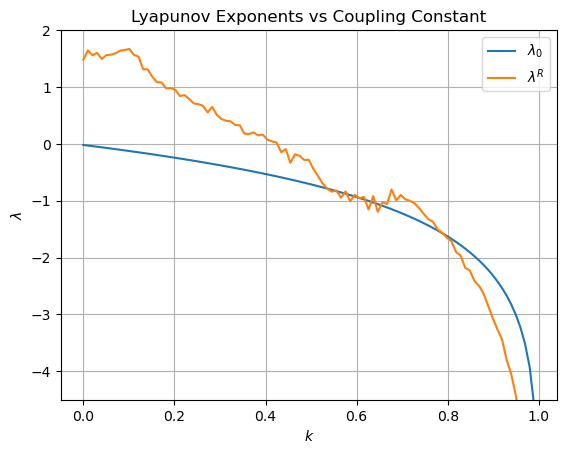

In [52]:
# Parameters
r = 2.5
k_values = np.linspace(0, 1, 100)
n_iterations = 1000
n_transients = 500

con_le = []
trans_le = []

for k in k_values:
    le = ctrans_lyapunov(mu, k, n_iterations, n_transients)
    trans_le.append(le[0])
    le = ccon_lyapunov(mu, k, n_iterations, n_transients)
    con_le.append(le[0])
    
trans_le = np.log(1 - k_values) + np.array(trans_le)
con_le = np.log(1 - k_values) + np.array(con_le)

# Thresholds (Obtained by Eyeballing)
# plt.scatter(0.450, 0, color = 'r', zorder = 4, s = 10, label = r'$k_{w} = 0.45$')
# plt.scatter(0.840, 0, color = 'k', zorder = 3, s = 10, label = r'$k_{s} = 0.84$')

plt.plot(k_values, trans_le, zorder = 2, label = r'$\lambda_{0}$')
plt.plot(k_values, con_le, zorder = 2, label = r'$\lambda^{R}$')

plt.xlabel(r'$k$')
plt.ylabel(r'$\lambda$')
plt.title('Lyapunov Exponents vs Coupling Constant')
plt.ylim(-4.5, 2)
plt.legend()
plt.grid(True)
plt.show()